<span style="font-family: Segoe UI; font-size: 2.5em; font-weight: 300;">THE TITANIC PROJECT</span>

![](https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg)

<span style="font-family: Segoe UI; font-size: 2EM; font-weight: 300;">Summary</span>
* [1. Introduction](#introduction)
* [2. Environment Preparation](#envprep)
    - [2.1 Library Imports](#libimport)
        - [2.2.1 Data Cleaning](#datacleaning)
        - [2.2.2 Data Visualization](#datavisualization)
        - [2.2.3 Data Engineering](#)
        - [2.2.4 Data Modelling](#)
        - [2.2.5 Settings](#)
    - [2.2 Utils](#)
    - [2.3 Data Imports](#)
* [3. A bit of Exploratory Data Analysis](#)
    - [3.1 Age](#)
    - [3.2 Fare](#)
    - [3.3 Pclass](#)
    - [3.4 Sex](#)
    - [3.5 SibSp](#)
    - [3.6 Parch](#)
    - [3.7 Embarked](#)
* [4. Feature Engineering & Data Cleaning](#)
    - [4.1 Merge Train & Test for Transformation](#)
    - [4.2 Encoding Sex](#)
    - [4.3 Title](#)
    - [4.4 Name Length](#)
    - [4.5 One-hot Encode Embarked & Label Encode Title](#)
    - [4.6 Family Size](#)
    - [4.7 Label Encoding Family Size](#)
    - [4.8 FamilyName](#)
    - [4.9 Cabin](#)
    - [4.10 Cleaning Ticket](#)
    - [4.11 Ticket Frequency](#)
    - [4.12 One-hot Encoding Ticket](#)
    - [4.13 Fare into Categorical Bins](#)
    - [4.14 Additional Derived Features from Feature Relationships](#)
    - [4.15 Remove Constant Columns](#)
* [5. Imputation of Missing Values](#)
* [6. Final Adjustments](#)
    - [6.1 Create Age Banc](#)
    - [6.2 Obtain Features for Children & Seniors](#)
    - [6.3 Standard Scaling Data](#)
    - [6.4 Split Data Back to Train & Test](#)
* [7. Checking feature Importance & Correlations](#)
* [8. Preparation of Train & Test Data](#)
    - [8.1 Split the Data](#)
    - [8.2 Cross Validation (K-Fold)](#)
* [9. Model Development](#)
    - [9.1 Model Evaluation](#)
    - [9.2 Prediction](#)
        - [9.2.1 AdaBoost](#)
        - [9.2.2 Bagging](#)
        - [9.2.3 Gradient Boosting](#)
        - [9.2.4 Extra Trees](#)
        - [9.2.5 Random Forest](#)
        - [9.2.6 Gaussian Process](#)
        - [9.2.7 Logistic Regression](#)
        - [9.2.8 Ridge](#)
        - [9.2.9 Perceptron](#)
        - [9.2.10 Passive Agressive](#)
        - [9.2.11 SGD](#)
        - [9.2.12 Gaussian Naive Bayes](#)
        - [9.2.13 Bernoulli](#)
        - [9.2.14 K-Nearest Neighbors](#)
        - [9.2.15 Support Vector Clustering](#)
        - [9.2.16 Linear SVC](#)
        - [9.2.17 NuSVC](#)
        - [9.2.18 Decision Tree](#)
        - [9.2.19 Linear Discriminant Analysis](#)
        - [9.2.20 XGBoost](#)
        - [9.2.21 Keras](#)
    - [9.3 Model Performance](#)
    - [9.4 Stack](#)
    - [9.5 Voting](#)
    - [9.6 Tunning Parameters](#)
* [10. Submission](#)
    - [10.1. Using Stack](#)
    - [10.2. Using Keras](#)
    - [10.3. Using Voting](#)
    - [10.4. Final Adjustments](#)
* [11. Credits](#)

<a id="introduction"></a>
# 1. Introduction

#### Goal
* The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

#### Details & Description of Features:

* PassengerID
* Survived - (0 = No, 1 = Yes)
* Pclass - Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)
* Name
* Sex
* Age
* SibSp - Number of Siblings/Spouses Aboard
* Parch - Number of Parents/Children Aboard
* Ticket - Ticket Number
* Fare - Passenger Fare in British pound
* Cabin - Cabin Number
* Embarked - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

<a id="envprep"></a>
# 2. Environment Preparation

<a id="libimport"></a>
### 2.1 Library Imports
Libraries provide pre-written functionality to perform necessary tasks. The idea is why write ten lines of code, when you can write one line.

<a id="datacleaning"></a>
#### 2.1.1 Data Cleaning
* Pandas is a software library for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.
* NumPy is a library for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

In [79]:
import numpy as np
import pandas as pd

<a id="datavisualization"></a>
#### 2.1.2. Data Visualization
* Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK. Pyplot is a Matplotlib module which provides a MATLAB-like interface. Matplotlib is designed to be as usable as MATLAB, with the ability to use Python, and the advantage of being free and open-source.

* Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [80]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

import seaborn as sns
sns.set(rc={"font.size":18,"axes.titlesize":30,"axes.labelsize":18,
            "axes.titlepad":22, "axes.labelpad":18, "legend.fontsize":15,
            "legend.title_fontsize":15, "figure.titlesize":35})

#### 2.1.3. Data Engineering
I will talk about these classes later!

In [81]:
from optbinning import OptimalBinning
from statsmodels.stats.outliers_influence import variance_inflation_factor
import re

#### 2.1.4. Modelling
* Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

* TensorFlow is a free and open-source software library for machine learning. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.

In [82]:
from sklearn import *
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras import *

#### 2.1.5. Settings

In [83]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### 2.2. Utils

It is important to keep your main functions in one place to stay organized.

In [84]:
# Get missing totals and percentage for each column
def get_missing(df):    
    missing = df.isnull().sum()
    missing_percentage = df.isnull().sum() / df.isnull().count() * 100
    missing_percentage = round(missing_percentage, 1)
    missing_data = pd.concat([missing, missing_percentage], axis=1, keys=['Total', '%'])
    missing_data = missing_data[missing_data['Total'] > 0].sort_values(by=['%'], ascending=False)
    
    return missing_data

# Calculate the Variance Inflation Factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

### 2.3. Data Imports

In [85]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


It is Important to save the shape of your train and test data before you start coding. 
You must have the same number of rows in your test data before your submission. 

In [86]:
print(df_train.shape, df_test.shape)

(891, 12) (418, 11)


# 3. Exploratory Data Analysis
Exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods

In [87]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 3.1 Age

We can observe that children and the elderly are more likely to survive

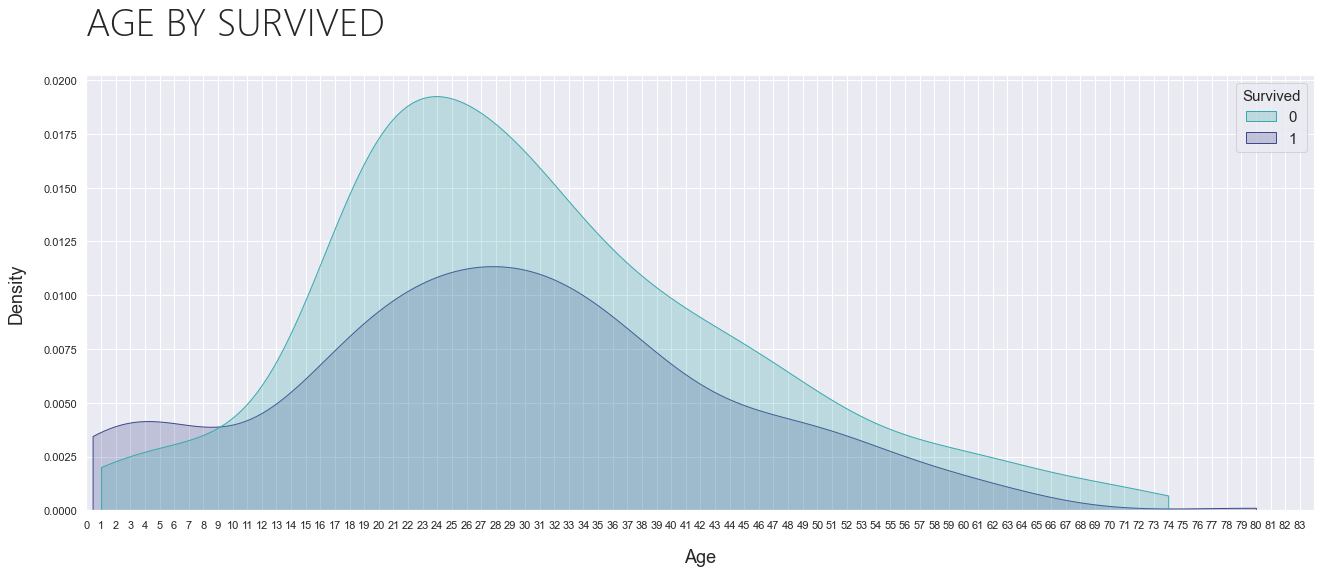

In [88]:
fig = plt.figure(figsize=(22,8))
kde = sns.kdeplot(x="Age", data=df_train, cut=0, hue="Survived", fill=True, legend=True, palette="mako_r")

plt.xlim(0)

kde.xaxis.set_major_locator(ticker.MultipleLocator(1))
kde.xaxis.set_major_formatter(ticker.ScalarFormatter())

fig.suptitle("AGE BY SURVIVED", x=0.125, y=1.0, ha='left', fontweight=100, fontfamily='Segoe UI', size=39);

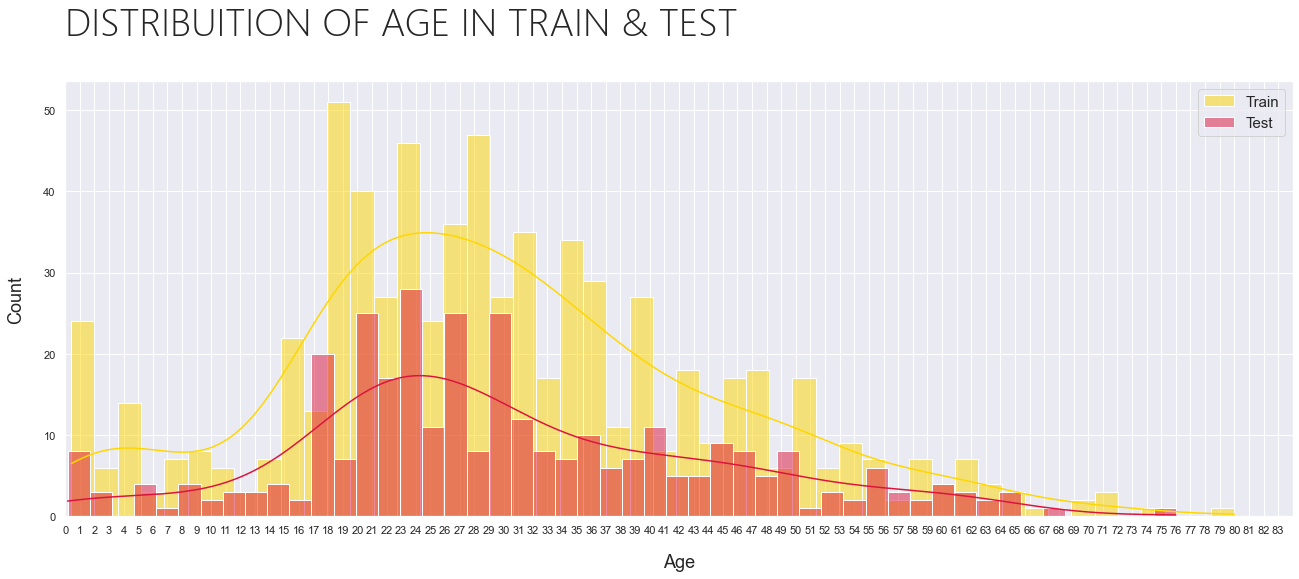

In [89]:
fig = plt.figure(figsize=(22, 8))
hist = sns.histplot(df_train["Age"], color="gold", kde=True, bins=50, label="Train")
hist = sns.histplot(df_test["Age"], color="crimson", kde=True, bins=50, label="Test")

plt.xlim(0)

title = fig.suptitle("DISTRIBUITION OF AGE IN TRAIN & TEST", x=0.125, y=1.01, ha='left', 
                     fontweight=100, fontfamily='Segoe UI', size=39)

hist.xaxis.set_major_locator(ticker.MultipleLocator(1))
hist.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.legend()
plt.show()

### 3.2. Fare

The wealthier also seem to have a better chance of surviving. We can see that the fares of the people who survived are more distributed, while the distribution of the people who died is concentrated in low fares.

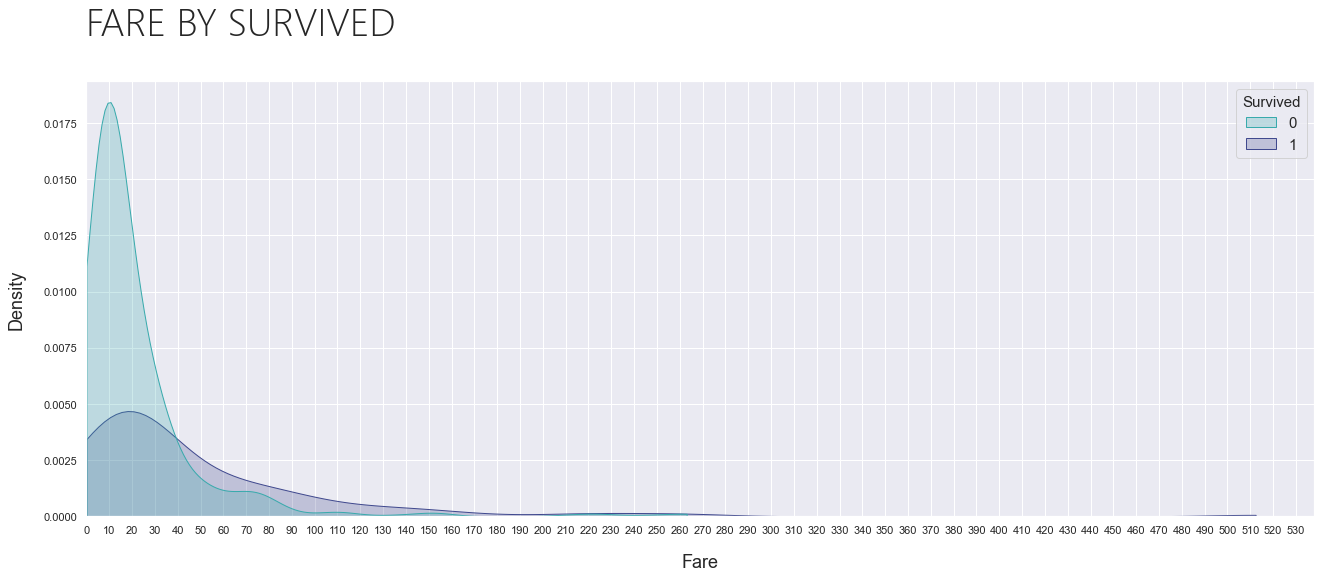

In [90]:
fig = plt.figure(figsize=(22,8))
kde = sns.kdeplot(x="Fare", data=df_train, cut=0, hue="Survived", fill=True, legend=True, palette="mako_r")

kde.xaxis.set_major_locator(ticker.MultipleLocator(10))
kde.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.xlim(0)

fig.suptitle("FARE BY SURVIVED", x=0.125, y=1.01, ha='left',fontweight=100, fontfamily='Segoe UI', size=39);

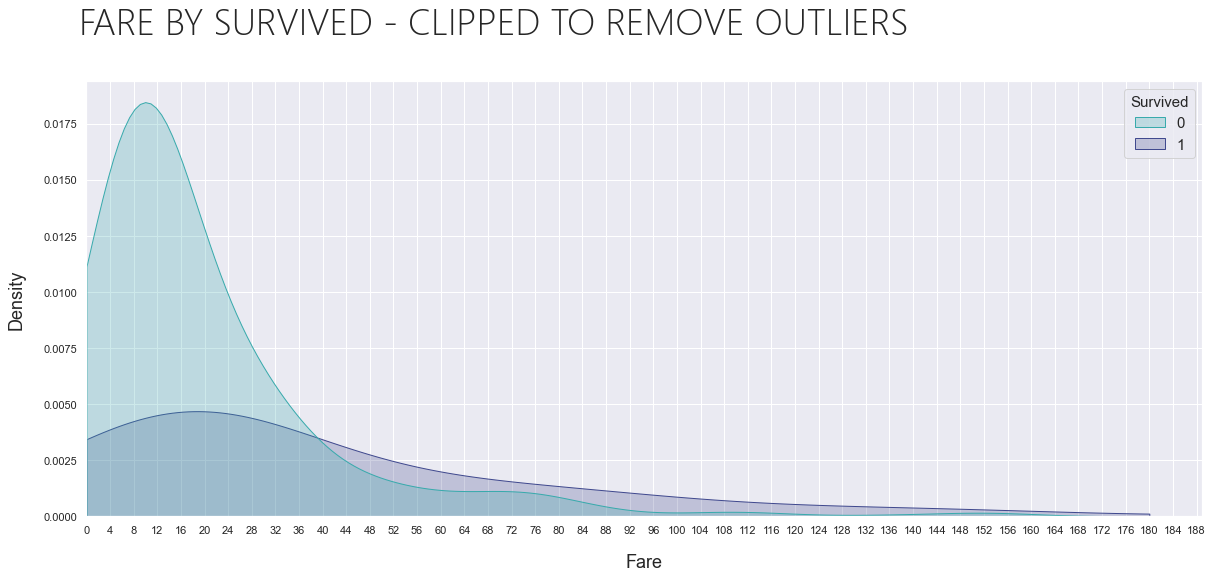

In [91]:
fig = plt.figure(figsize=(20,8))
kde = sns.kdeplot(x="Fare", data=df_train, cut=0, clip=[0,180], hue="Survived", fill=True, legend=True, palette="mako_r")

plt.xlim(0)

kde.xaxis.set_major_locator(ticker.MultipleLocator(4))
kde.xaxis.set_major_formatter(ticker.ScalarFormatter())

fig.suptitle("FARE BY SURVIVED - CLIPPED TO REMOVE OUTLIERS", x=0.12, y=1.01, ha='left', 
             fontweight=100, fontfamily='Segoe UI', size=37);

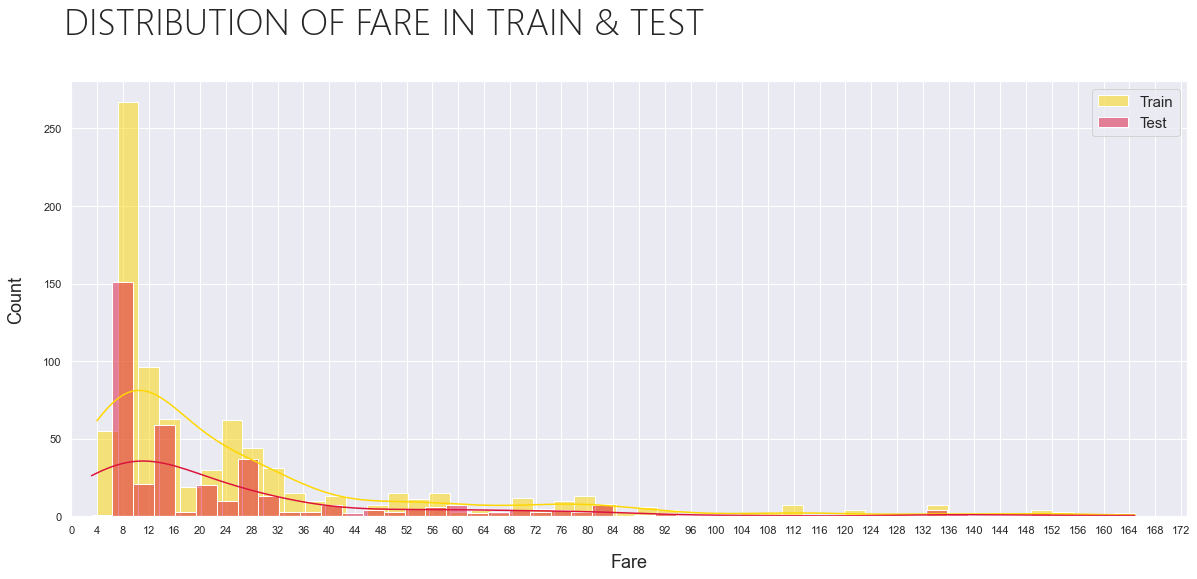

In [92]:
fig = plt.figure(figsize=(20,8))

dist = sns.histplot(df_train[(df_train.Fare > 0) & (df_train.Fare <=180)]['Fare'],
                    color="gold", 
                    kde=True, 
                    bins=50, 
                    label='Train')

dist = sns.histplot(df_test[(df_test.Fare > 0) & (df_test.Fare <=180)]['Fare'],
                    color="crimson", 
                    kde=True, 
                    bins=50, 
                    label='Test')

title = fig.suptitle("DISTRIBUTION OF FARE IN TRAIN & TEST", 
                     x=0.12, 
                     y=1.01, 
                     ha='left',
                     fontweight=100, 
                     fontfamily='Segoe UI', 
                     size=37)

plt.xlim(0)

dist.xaxis.set_major_locator(ticker.MultipleLocator(4))
dist.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.legend()
plt.show()

### 3.3. Pclass

Remembering: Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd).

We can observe that the higher the class, the higher the likelihood of survival.

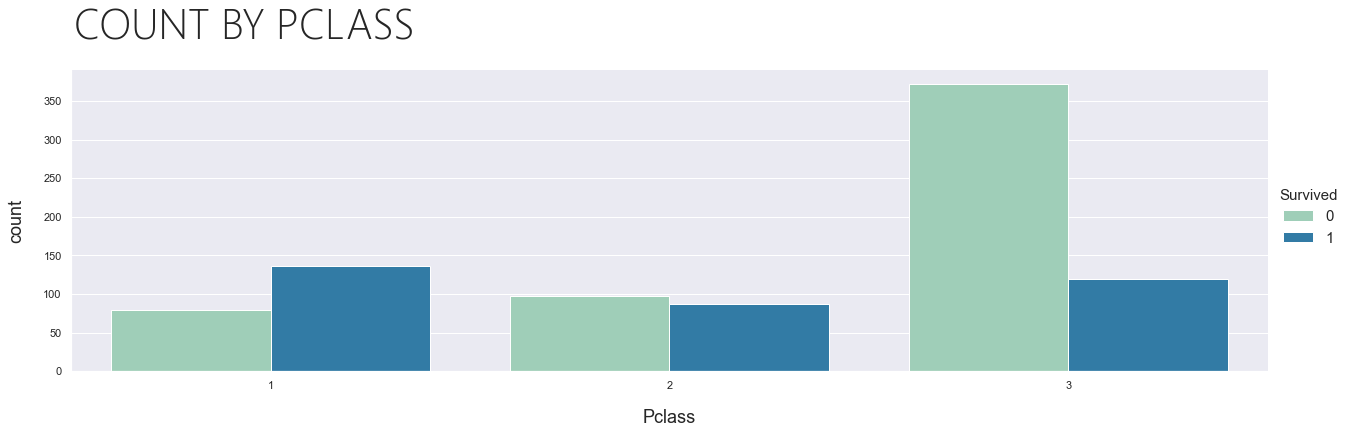

In [93]:
c1 = sns.catplot(x="Pclass", 
                 hue="Survived", 
                 kind="count", 
                 data=df_train,
                 aspect = 3.5, 
                 legend=True, 
                 palette="YlGnBu")

title = c1.fig.suptitle("COUNT BY PCLASS", 
                        x=0.04, 
                        y=1.12, 
                        ha='left', 
                        fontweight=100, 
                        fontfamily='Segoe UI', 
                        size=42)

### 3.4. Sex

Clearly, men have a low survival rate

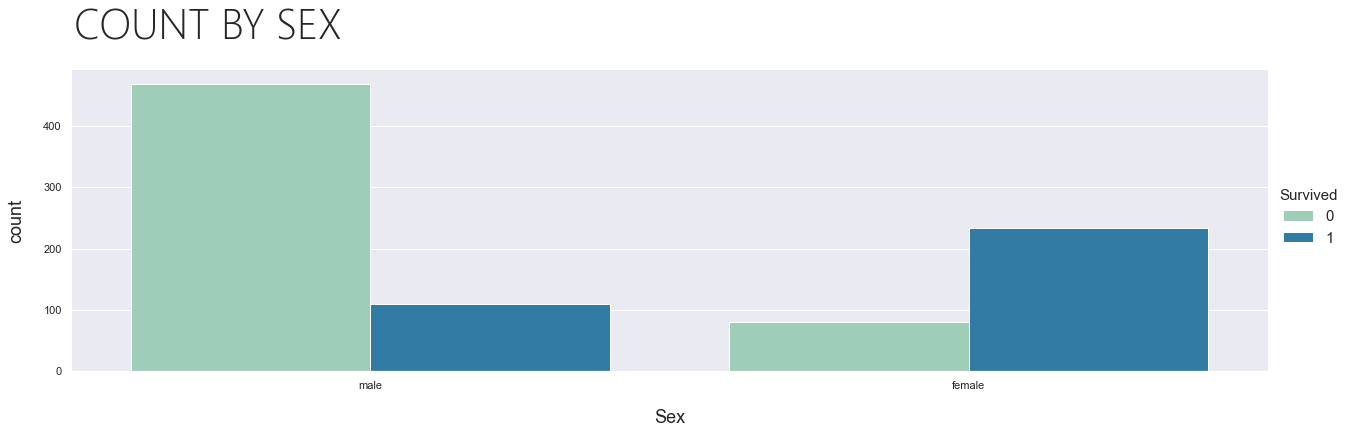

In [94]:
c1 = sns.catplot(x="Sex", 
                 hue="Survived", 
                 kind="count", 
                 data=df_train,
                 aspect = 3.5, 
                 legend=True, 
                 palette="YlGnBu")

title = c1.fig.suptitle("COUNT BY SEX", 
                        x=0.04, 
                        y=1.12, 
                        ha='left', 
                        fontweight=100, 
                        fontfamily='Segoe UI', 
                        size=42)

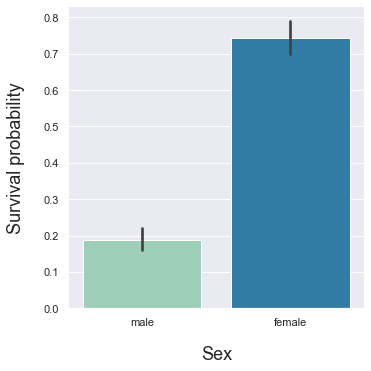

In [95]:
g = sns.catplot(x="Sex", y="Survived", data=df_train,kind="bar", palette = "YlGnBu")
g.set_ylabels("Survival probability")

### 3.5. SibSp

Remembering: Number of Siblings/Spouses Aboard.

People who don't have anybody aboard seem to have a low survival rate.

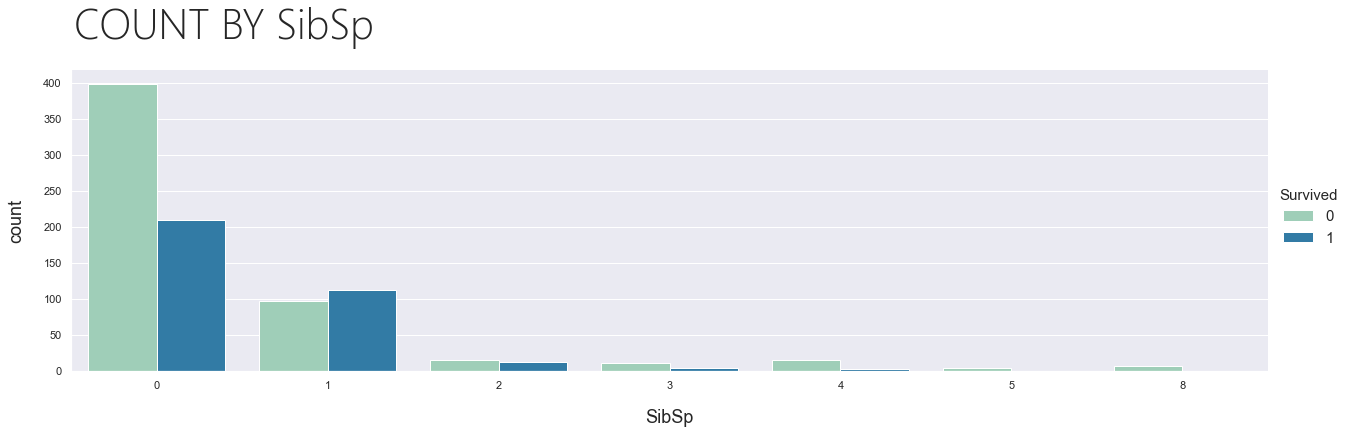

In [96]:
c1 = sns.catplot(x="SibSp", 
                 hue="Survived", 
                 kind="count", 
                 data=df_train,
                 aspect = 3.5, 
                 legend=True, 
                 palette="YlGnBu")

title = c1.fig.suptitle("COUNT BY SibSp", 
                        x=0.04, 
                        y=1.12, 
                        ha='left', 
                        fontweight=100, 
                        fontfamily='Segoe UI', 
                        size=42)

### 3.6. Parch

Remembering: Number of Parents/Children Aboard

The idea is the same as SibSp. People who don't have anybody seem to have a low survival rate.

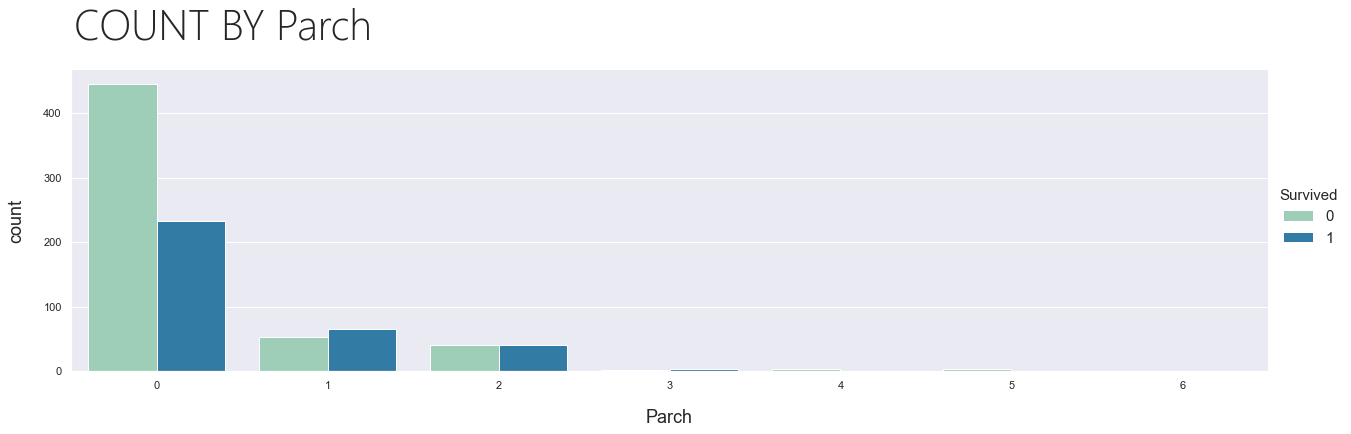

In [97]:
c1 = sns.catplot(x="Parch", 
                 hue="Survived", 
                 kind="count", 
                 data=df_train,
                 aspect = 3.5, 
                 legend=True, 
                 palette="YlGnBu")

title = c1.fig.suptitle("COUNT BY Parch", 
                        x=0.04, 
                        y=1.12, 
                        ha='left', 
                        fontweight=100, 
                        fontfamily='Segoe UI', 
                        size=42)

### 3.7. Embarked

Remembering: Embarked - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
    
Southampton seems to be the most dangerous, while people who embarked in Cherbourg have the highest survival rate.

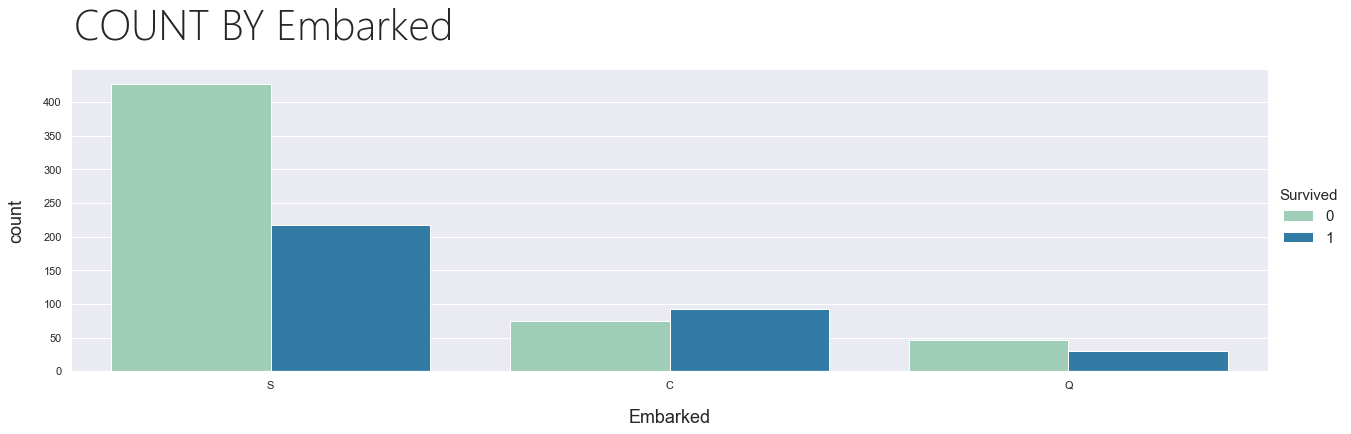

In [98]:
c1 = sns.catplot(x="Embarked", 
                 hue="Survived", 
                 kind="count", 
                 data=df_train,
                 aspect = 3.5, 
                 legend=True, 
                 palette="YlGnBu")

title = c1.fig.suptitle("COUNT BY Embarked", 
                        x=0.04, 
                        y=1.12, 
                        ha='left', 
                        fontweight=100, 
                        fontfamily='Segoe UI', 
                        size=42)

# 4. Feature Engineering & Data Cleaning

### 4.1. Merge Train & Test for Transformation


In [99]:
# Let's merge train and test for future feature engineering
full_df = pd.concat([df_train, df_test]).reset_index(drop=True)

# This is a validation sample, so we can avoid overfitting
df_train_test = df_train.sample(frac=0.2,random_state=123)
y_train_test = df_train_test[["Survived", "PassengerId"]]
df_train_test = df_train_test.drop(["Survived"], axis=1)
list_index = df_train_test.index.values.tolist()
df_train_train = df_train[~df_train.index.isin(list_index)]
full_df_model = pd.concat([df_train_test, df_train_train])

train_shape = df_train.shape
test_shape = df_test.shape

In [100]:
print(full_df.shape, df_train.shape, df_train_train.shape, df_train_test.shape, full_df_model.shape)

(1309, 12) (891, 12) (713, 12) (178, 11) (891, 12)


### 4.2. Encoding Sex

Machine learning models require all input and output variables to be numeric.

This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model.

In [101]:
full_df.loc[:, 'Sex'] = (full_df.loc[:, 'Sex'] == 'female').astype(int)

### 4.3. Title

From the Name variable, we can extract the person's title. So we have data that shows us sex, position and wealth at the same time. The title is a variable that correlates with our dependent variable.

In [102]:
full_df.Name.head()

0                                Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Thayer)
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
Name: Name, dtype: object

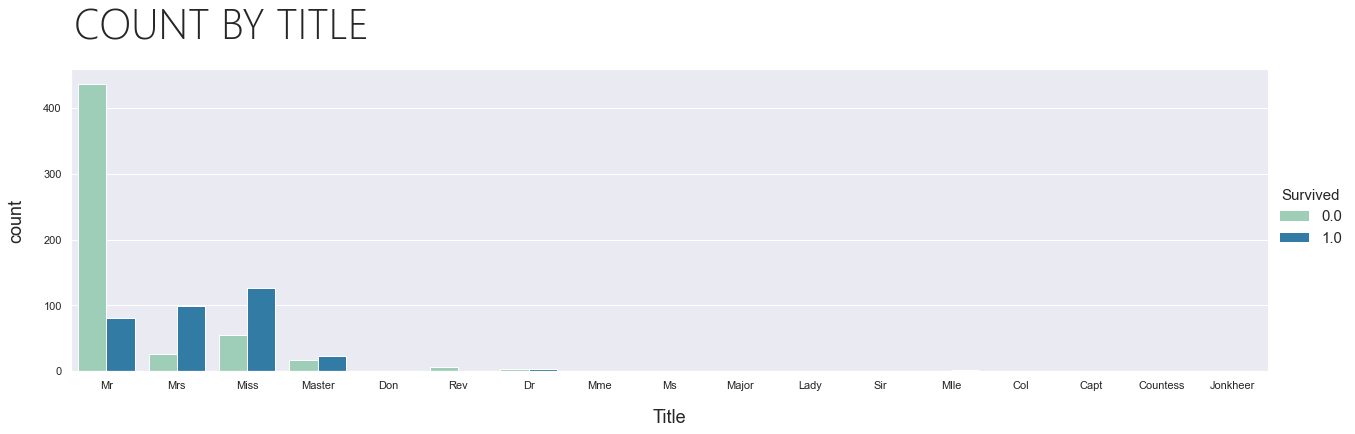

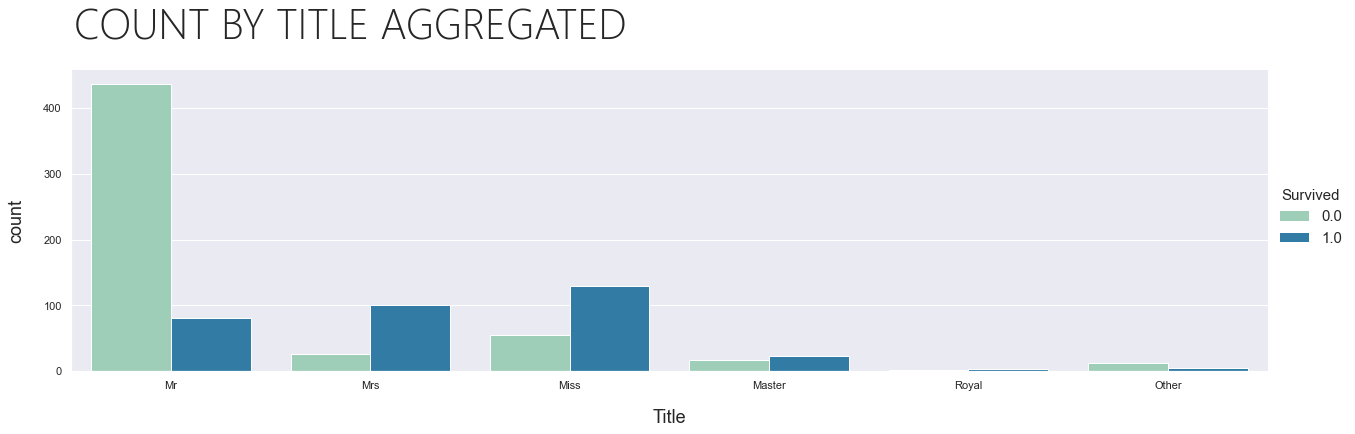

In [103]:
full_df["Title"] = full_df["Name"]
full_df["Title"] = full_df["Name"].str.extract("([A-Za-z]+)\.", expand=True)

c1 = sns.catplot(x="Title", hue="Survived", kind="count", data=full_df[:train_shape[0]],
                 aspect = 3.5, legend=True, palette="YlGnBu")

title = c1.fig.suptitle("COUNT BY TITLE", x=0.04, y=1.12, ha='left',
             fontweight=100, fontfamily='Segoe UI', size=42)

# Replacing rare titles 
mapping = {'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs', 'Major': 'Other', 
           'Col': 'Other', 'Dr' : 'Other', 'Rev' : 'Other', 'Capt': 'Other', 
           'Jonkheer': 'Royal', 'Sir': 'Royal', 'Lady': 'Royal', 
           'Don': 'Royal', 'Countess': 'Royal', 'Dona': 'Royal'}
           
full_df.replace({'Title': mapping}, inplace=True)

c2 = sns.catplot(x="Title", hue="Survived", kind="count", data=full_df[:train_shape[0]],
                 aspect = 3.5, legend=True, palette="YlGnBu")
c2.fig.suptitle("COUNT BY TITLE AGGREGATED", x=0.04, y=1.12, ha='left',
             fontweight=100, fontfamily='Segoe UI', size=42);

### 4.4. Name Length

The basic intuition behind this feature is that people with longer names tends to be of a higher class and thus would have likely survived. 

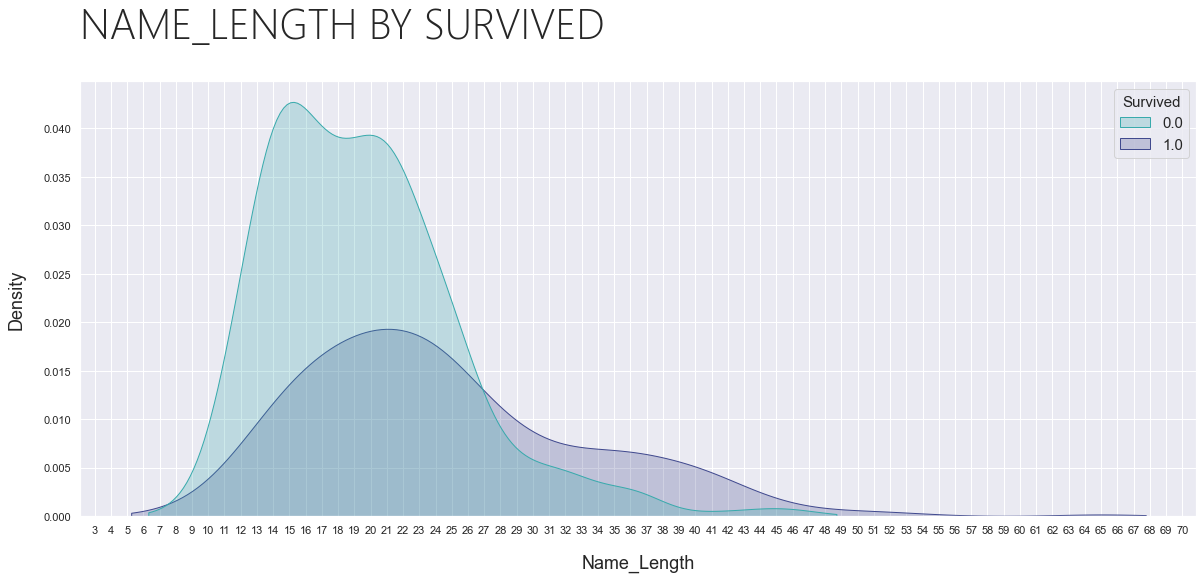

In [104]:
full_df["Name_Length"] = full_df.Name.str.replace("[^a-zA-Z]", "").str.len()

fig, ax = plt.subplots(ncols=1, figsize=(20,8))
kde = sns.kdeplot(x="Name_Length", data=full_df[:train_shape[0]], cut=True,
                  hue="Survived", fill=True, ax=ax, palette="mako_r")

kde.xaxis.set_major_locator(ticker.MultipleLocator(1))
kde.xaxis.set_major_formatter(ticker.ScalarFormatter())

fig.suptitle("NAME_LENGTH BY SURVIVED", x=0.125, y=1.01, ha='left',
             fontweight=100, fontfamily='Segoe UI', size=42);

### 4.5. One-hot Encode Embarked & Label Encode Title

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. It accepts only Numerical data as input. It takes a column which has categorical data, which has been label encoded and then splits the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value.

We use Label Encode technique when the categorical feature is ordinal. In this case, retaining the order is important. Hence encoding should reflect the sequence.

In [105]:
full_df['Title_C'] = full_df['Title']

full_df['Embarked'] = full_df['Embarked'].fillna('S')
full_df = pd.get_dummies(full_df, columns=["Embarked","Title_C"],prefix=["Emb","Title"], drop_first=False)

title_dict = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Other': 4, 'Royal': 5, 'Master': 6}
full_df['Title'] = full_df['Title'].map(title_dict).astype('int')

### 4.6. Derive Family Size Feature

We saw earlier that the number of parents and siblings is relevant to know the likelihood of survival. In this way, we will create variables that represent the size of the family and whether the person is alone on the ship.

In [106]:
full_df['Family_Size'] = full_df['Parch'] + full_df['SibSp'] + 1
full_df['Fsize_Cat'] = full_df['Family_Size'].map(lambda val: 'Alone' if val <= 1 else ('Small' if val < 5 else 'Big'))
full_df["isAlone"] = full_df.Family_Size.apply(lambda x: 1 if x==1 else 0)

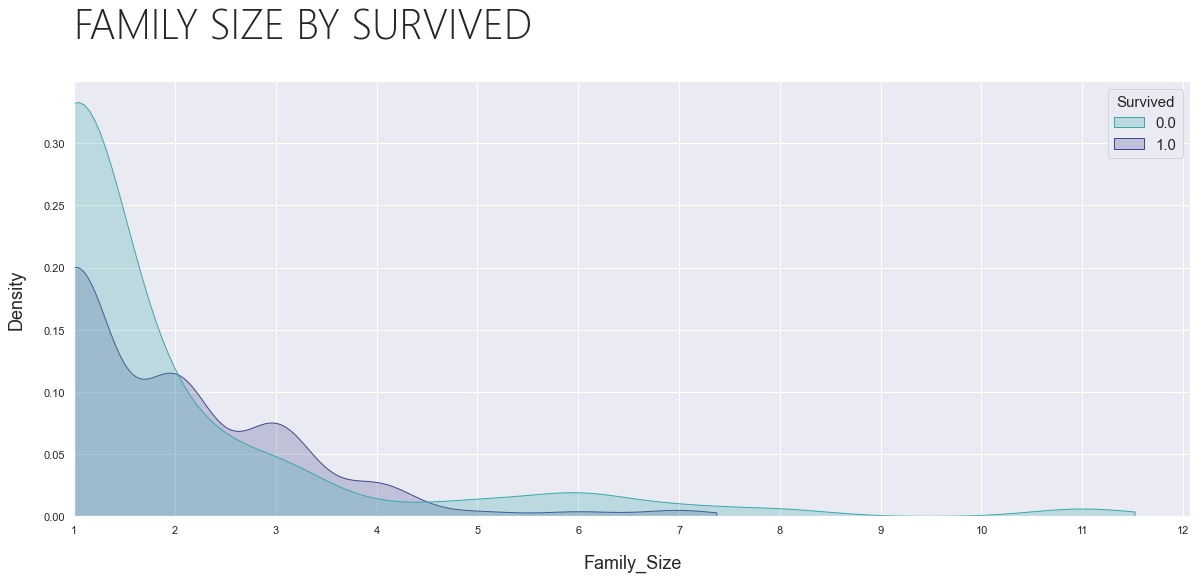

In [107]:
fig, ax = plt.subplots(ncols=1, figsize=(20,8))
kde = sns.kdeplot(x="Family_Size", data=full_df[:train_shape[0]], cut=True,
                  hue="Survived", fill=True, ax=ax, palette="mako_r")

kde.xaxis.set_major_locator(ticker.MultipleLocator(1))
kde.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.xlim(1)

fig.suptitle("FAMILY SIZE BY SURVIVED", x=0.125, y=1.01, ha='left',
             fontweight=100, fontfamily='Segoe UI', size=42);

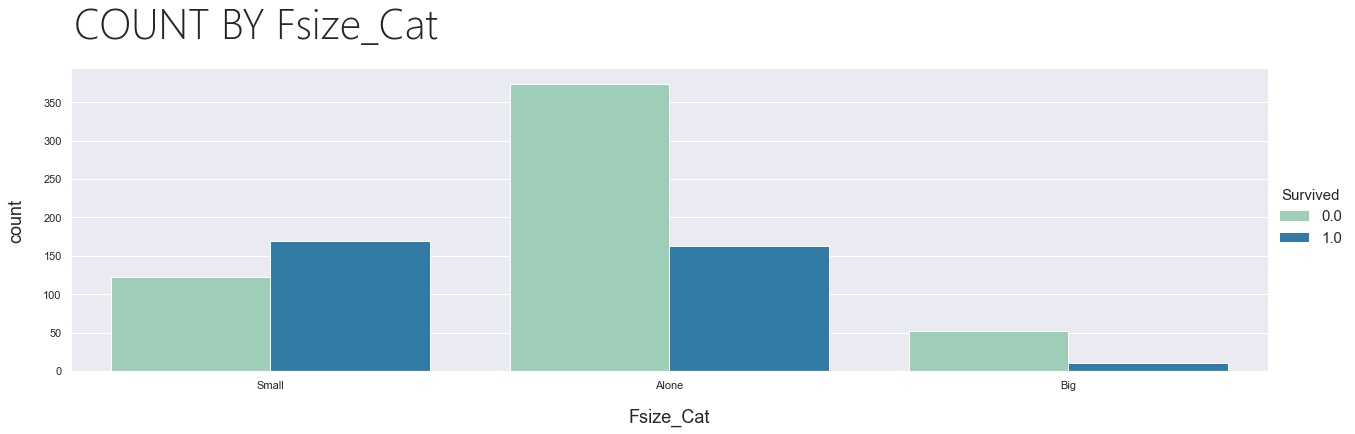

In [108]:
c1 = sns.catplot(x="Fsize_Cat", 
                 hue="Survived", 
                 kind="count", 
                 data=full_df[:train_shape[0]],
                 aspect = 3.5, 
                 legend=True, 
                 palette="YlGnBu")

title = c1.fig.suptitle("COUNT BY Fsize_Cat", 
                        x=0.04, 
                        y=1.12, 
                        ha='left', 
                        fontweight=100, 
                        fontfamily='Segoe UI', 
                        size=42)

### 4.7. Label Encoding Family Size

In [109]:
Fsize_dict = {'Alone':3, 'Small':2, 'Big':1}
full_df['Fsize_Cat'] = full_df['Fsize_Cat'].map(Fsize_dict).astype('int')

### 4.8. Extract FamilyName Feature from Name

If passengers with the same Last names are present, we group them and attach a calculated survival rate based on the train survival data. 

For no matching last names, the Ticket feature is used to group and calculate the survival rate in the same way.

From the data, we see Tickets are given to groups travelling together and they all have the same Ticket number.

Our target is directly influencing this variable. Thus, it is important that we create the variable in our validation dataset to not cause overfitting.

In [110]:
full_df['Family_Name'] = full_df['Name'].str.extract('([A-Za-z]+.[A-Za-z]+)\,', expand=True)
full_df_model['Family_Name'] = full_df_model['Name'].str.extract('([A-Za-z]+.[A-Za-z]+)\,', expand=True)

In [111]:
def create_family_rate(df, train):
    MEAN_SURVIVAL_RATE = round(np.mean(train['Survived']), 4)

    df['Family_Friends_Surv_Rate'] = MEAN_SURVIVAL_RATE
    df['Surv_Rate_Invalid'] = 1
    
    for _, grp_df in df[['Survived', 'Family_Name', 'Fare', 'Ticket', 'PassengerId']].groupby(['Family_Name', 'Fare']):                       
        if (len(grp_df) > 1):
            if(grp_df['Survived'].isnull().sum() != len(grp_df)):
                for ind, row in grp_df.iterrows():
                    df.loc[df['PassengerId'] == row['PassengerId'],
                                'Family_Friends_Surv_Rate'] = round(grp_df['Survived'].mean(), 4)
                    df.loc[df['PassengerId'] == row['PassengerId'],
                                'Surv_Rate_Invalid'] = 0

    for _, grp_df in df[['Survived', 'Family_Name', 'Fare', 'Ticket', 'PassengerId', 
                              'Family_Friends_Surv_Rate']].groupby('Ticket'):
        if (len(grp_df) > 1):
            for ind, row in grp_df.iterrows():
                if (row['Family_Friends_Surv_Rate'] == 0.) | (row['Family_Friends_Surv_Rate'] == MEAN_SURVIVAL_RATE):
                    if(grp_df['Survived'].isnull().sum() != len(grp_df)):
                        df.loc[full_df['PassengerId'] == row['PassengerId'],
                                    'Family_Friends_Surv_Rate'] = round(grp_df['Survived'].mean(), 4)
                        df.loc[full_df['PassengerId'] == row['PassengerId'],
                                    'Surv_Rate_Invalid'] = 0
                        
    return df

In [112]:
full_df = create_family_rate(full_df, df_train)
full_df_model = create_family_rate(full_df_model, df_train_train)

In [113]:
full_df = full_df.drop(["Name", "Family_Name"], axis=1)
full_df_model = full_df_model.drop(["Name", "Family_Name"], axis=1)

### 4.9. Cleaning & Encoding of the Cabin

In [114]:
# Replace missing values with 'U' for Cabin
full_df['Cabin_Clean'] = full_df['Cabin'].fillna('U')
full_df['Cabin_Clean'] = full_df['Cabin_Clean'].str.strip(' ').str[0]

# Label Encoding
cabin_dict = {'A':9, 'B':8, 'C':7, 'D':6, 'E':5, 'F':4, 'G':3, 'T':2, 'U':1}
full_df['Cabin_Clean'] = full_df['Cabin_Clean'].map(cabin_dict).astype('int')
full_df.drop(["Cabin"], axis=1, inplace=True)

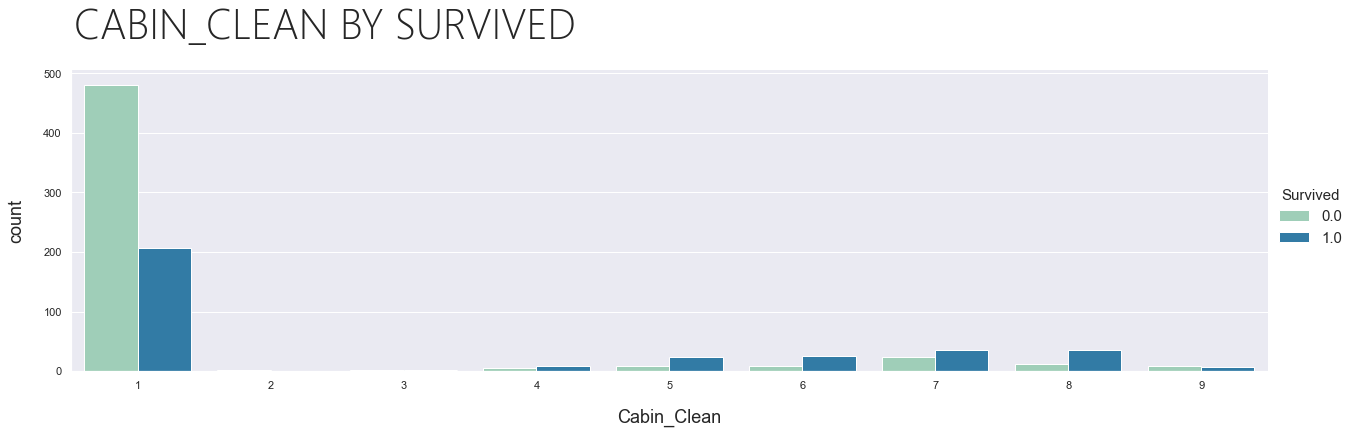

In [115]:
c1 = sns.catplot(x="Cabin_Clean", 
                 hue="Survived", 
                 kind="count", 
                 data=full_df[:train_shape[0]],
                 aspect = 3.5, 
                 legend=True, 
                 palette="YlGnBu")

title = c1.fig.suptitle("CABIN_CLEAN BY SURVIVED", 
                        x=0.04, 
                        y=1.12, 
                        ha='left', 
                        fontweight=100, 
                        fontfamily='Segoe UI', 
                        size=42)

### 4.10. Cleaning the Ticket

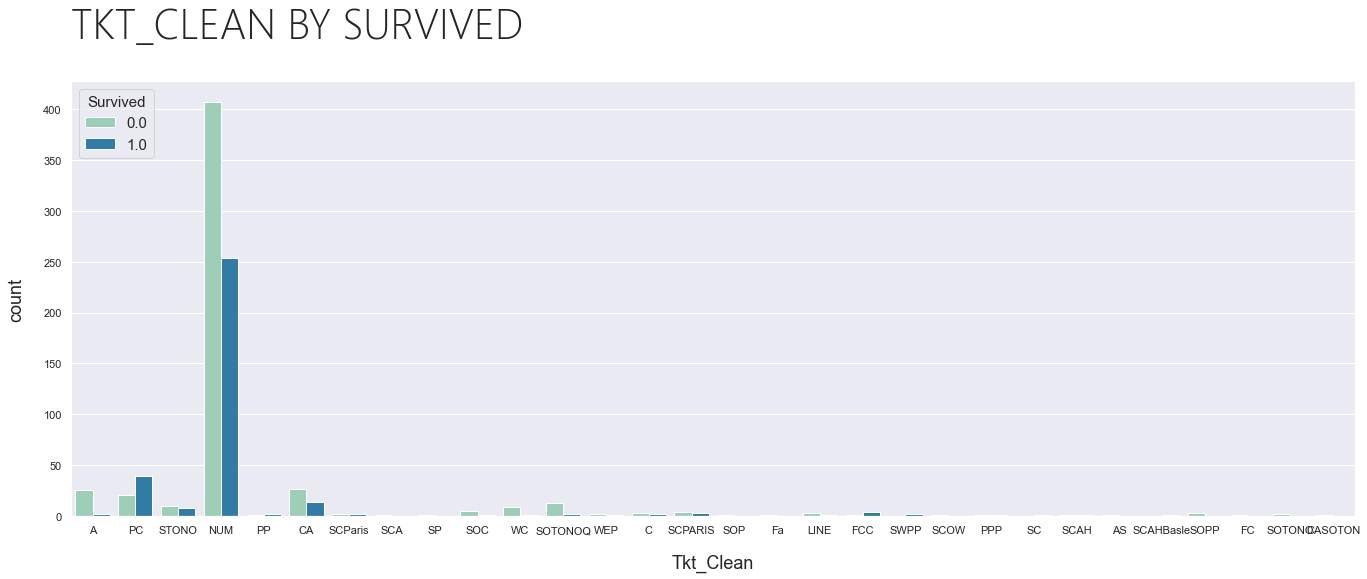

In [116]:
def clean_ticket(each_ticket):
    prefix = re.sub(r'[^a-zA-Z]', '', each_ticket)
    if(prefix):
        return prefix
    else:
        return "NUM"

full_df["Tkt_Clean"] = full_df.Ticket.apply(clean_ticket)

fig, ax = plt.subplots(ncols=1, figsize=(23,8))
sns.countplot(x="Tkt_Clean", data=full_df[:train_shape[0]], hue="Survived", fill=True, ax=ax, palette="YlGnBu")
fig.suptitle("TKT_CLEAN BY SURVIVED", x=0.125, y=1.01, ha='left',
             fontweight=100, fontfamily='Segoe UI', size=42);

### 4.11. Derive the Ticket Frequency

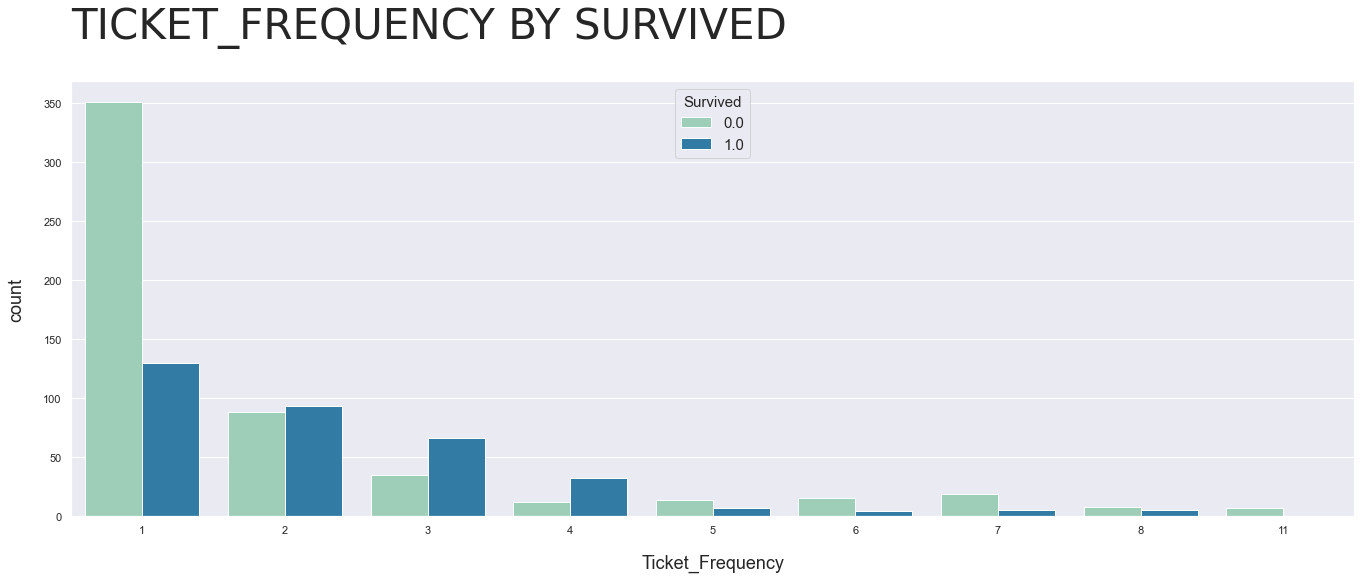

In [117]:
full_df['Ticket_Frequency'] = full_df.groupby('Ticket')['Ticket'].transform('count')
full_df.drop(["Ticket"], axis=1, inplace=True)
fig, ax = plt.subplots(ncols=1, figsize=(23,8))
sns.countplot(x="Ticket_Frequency", data=full_df[:train_shape[0]], hue="Survived", fill=True, ax=ax, palette="YlGnBu")

fig.suptitle("TICKET_FREQUENCY BY SURVIVED", x=0.125, y=1.01, ha='left',
             fontweight=100, fontfamily='Lato', size=42);

### 4.12. One-hot Encoding Ticket

In [118]:
full_df = pd.get_dummies(full_df, columns=["Tkt_Clean"], prefix=["Tkt"], drop_first=True)

### 4.13. Fare into Categorical Bins

Kernal density estimation plot of Fare gave us some insights on its distribution and impact on survival. We will use those to add a derived categorical feature from Fare.

In [119]:
def fare_cat(fare):
    if fare <= 7.0:
        return 1
    elif fare <= 39 and fare > 7.0:
        return 2
    else:
        return 3

full_df.loc[:, 'Fare_Cat'] = full_df['Fare'].apply(fare_cat).astype('int')

### 4.14. Additional Derived Features from Feature Relationships

In [120]:
full_df.loc[:, 'Fare_Family_Size'] = full_df['Fare'] / full_df['Family_Size']

full_df.loc[:, 'Fare_Cat_Pclass'] = full_df['Fare_Cat'] * full_df['Pclass']
full_df.loc[:, 'Fare_Cat_Title'] = full_df['Fare_Cat'] * full_df['Title']

full_df.loc[:, 'Fsize_Cat_Title'] = full_df['Fsize_Cat'] * full_df['Title']
full_df.loc[:, 'Fsize_Cat_Fare_Cat'] = full_df['Fare_Cat'] / full_df['Fsize_Cat'].astype('int')

full_df.loc[:, 'Pclass_Title'] = full_df['Pclass'] * full_df['Title']
full_df.loc[:, 'Fsize_Cat_Pclass'] = full_df['Fsize_Cat'] * full_df['Pclass']

### 4.15. Remove Constant Columns

In [121]:
colsToRemove = []
cols = ['Tkt_AQ', 'Tkt_AS', 'Tkt_C', 'Tkt_CA',
         'Tkt_CASOTON', 'Tkt_FC', 'Tkt_FCC', 'Tkt_Fa', 'Tkt_LINE', 'Tkt_LP',
         'Tkt_NUM', 'Tkt_PC', 'Tkt_PP', 'Tkt_PPP', 'Tkt_SC', 'Tkt_SCA',
         'Tkt_SCAH', 'Tkt_SCAHBasle', 'Tkt_SCOW', 'Tkt_SCPARIS', 'Tkt_SCParis',
         'Tkt_SOC', 'Tkt_SOP', 'Tkt_SOPP', 'Tkt_SOTONO', 'Tkt_SOTONOQ',
         'Tkt_SP', 'Tkt_STONO', 'Tkt_STONOQ', 'Tkt_SWPP', 'Tkt_WC', 
         'Tkt_WEP', 'Fare_Cat', 'Fare_Family_Size', 'Fare_Cat_Pclass',
         'Fare_Cat_Title', 'Fsize_Cat_Title', 'Fsize_Cat_Fare_Cat', 
         'Pclass_Title', 'Fsize_Cat_Pclass']

for col in cols:
    if full_df[col][:train_shape[0]].std() == 0: 
        colsToRemove.append(col)

full_df.drop(colsToRemove, axis=1, inplace=True)
print("Removed {} Constant Columns\n".format(len(colsToRemove)))
print(colsToRemove)

Removed 3 Constant Columns

['Tkt_AQ', 'Tkt_LP', 'Tkt_STONOQ']


# 5. Imputation of Missing Values

In [122]:
features = ["Survived",'Family_Friends_Surv_Rate','Surv_Rate_Invalid']
df = full_df.copy()
df.loc[df.PassengerId.isin(full_df_model.PassengerId), features] = full_df_model[features]
passenger_list = full_df_model["PassengerId"].tolist()
full_df_model = df[df["PassengerId"].isin(passenger_list)]

In [123]:
imp_features = ['Pclass', 
                'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title',
                 'Name_Length',
                'Emb_C', 'Emb_Q', 'Emb_S','Family_Size',
                 'Fsize_Cat', 'Family_Friends_Surv_Rate', 'Surv_Rate_Invalid',
                 'Cabin_Clean','Ticket_Frequency', 'Tkt_AS', 'Tkt_C', 'Tkt_CA',
                 'Tkt_CASOTON', 'Tkt_FC', 'Tkt_FCC', 'Tkt_Fa', 'Tkt_LINE',
                 'Tkt_NUM', 'Tkt_PC', 'Tkt_PP', 'Tkt_PPP', 'Tkt_SC', 'Tkt_SCA',
                 'Tkt_SCAH', 'Tkt_SCAHBasle', 'Tkt_SCOW', 'Tkt_SCPARIS', 'Tkt_SCParis',
                 'Tkt_SOC', 'Tkt_SOP', 'Tkt_SOPP', 'Tkt_SOTONO', 'Tkt_SOTONOQ',
                 'Tkt_SP', 'Tkt_STONO', 'Tkt_SWPP', 'Tkt_WC', 
                 'Tkt_WEP', 'Fare_Cat', 'Fare_Family_Size', 'Fare_Cat_Pclass',
                 'Fare_Cat_Title', 'Fsize_Cat_Title', 'Fsize_Cat_Fare_Cat', 
                 'Pclass_Title', 'Fsize_Cat_Pclass']

imputer = impute.KNNImputer(n_neighbors=10, missing_values=np.nan)
imputer.fit(full_df[imp_features])
full_df.loc[:, imp_features] = pd.DataFrame(imputer.transform(full_df[imp_features]), 
                                            index=full_df.index, columns = imp_features)

In [124]:
imputer = impute.KNNImputer(n_neighbors=10, missing_values=np.nan)
imputer.fit(full_df_model[imp_features])
full_df_model.loc[:, imp_features] = pd.DataFrame(imputer.transform(full_df_model[imp_features]), 
                                            index=full_df_model.index, columns = imp_features)

# 6. Final Adjustments

### 6.1. Create Age Band

OptBinning is a library written in Python implementing a rigorous and flexible mathematical programming formulation to solving the optimal binning problem for a binary, continuous and multiclass target type, incorporating constraints not previously addressed.

It is really useful and you can see details here: http://gnpalencia.org/optbinning/

In [125]:
def create_optmal_binning(df):
    optb = OptimalBinning(name="Age", dtype="numerical", solver="cp")
    x = df[:train_shape[0]]["Age"].values
    y_train = df[:train_shape[0]]["Survived"]
    y = y_train[y_train.index.isin(df_train.index)]
    optb.fit(x, y)
    
    return optb
    
def transform_variable(df):
    list_index = df.index.values.tolist()
    col = df["Age"].values
    x_transform = optb.transform(col, metric="event_rate")
    x_transform = pd.Series(x_transform, index=list_index)
    x_transform.value_counts()
    x_transform = x_transform.rename("Age_Band")
    df = pd.concat((df, x_transform), axis=1)
    
    return df

In [126]:
optb = create_optmal_binning(full_df)

Look at the output below how the library already grouped the variable for us according to the survival rate!

In [127]:
binning_table = optb.binning_table
binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, 6.25)",48,0.053872,14,34,0.708333,-1.360591,0.100567,1.168296e-02
1,"[6.25, 17.50)",72,0.080808,42,30,0.416667,-0.136815,0.001535,1.916755e-04
2,"[17.50, 24.40)",194,0.217733,121,73,0.376289,0.032043,0.000223,2.783826e-05
3,"[24.40, 27.05)",75,0.084175,47,28,0.373333,0.044655,0.000167,2.086827e-05
4,"[27.05, 28.68)",47,0.052750,39,8,0.170213,1.110832,0.052927,6.295440e-03
5,"[28.68, 34.65)",177,0.198653,118,59,0.333333,0.219859,0.009327,1.163507e-03
6,"[34.65, 47.38)",188,0.210999,116,72,0.382979,0.003636,0.000003,3.486114e-07
7,"[47.38, inf)",90,0.101010,52,38,0.422222,-0.159630,0.002617,3.267641e-04
8,Special,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000e+00
9,Missing,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000e+00


And we can convert the bins to the event rate

In [128]:
full_df = transform_variable(full_df)

Once again, we are creating a variable influenced directly by the target. So, let's also create the variable in the dataset where we have our validation data to avoid overfitting.

In [129]:
optb = create_optmal_binning(full_df_model)
full_df_model = transform_variable(full_df_model)

### 6.2. Obtain Features for Children & Seniors

In [130]:
full_df['Child'] = full_df['Age'].map(lambda val:1 if val<18 else 0)
full_df['Senior'] = full_df['Age'].map(lambda val:1 if val>70 else 0)

<AxesSubplot:xlabel='Senior', ylabel='count'>

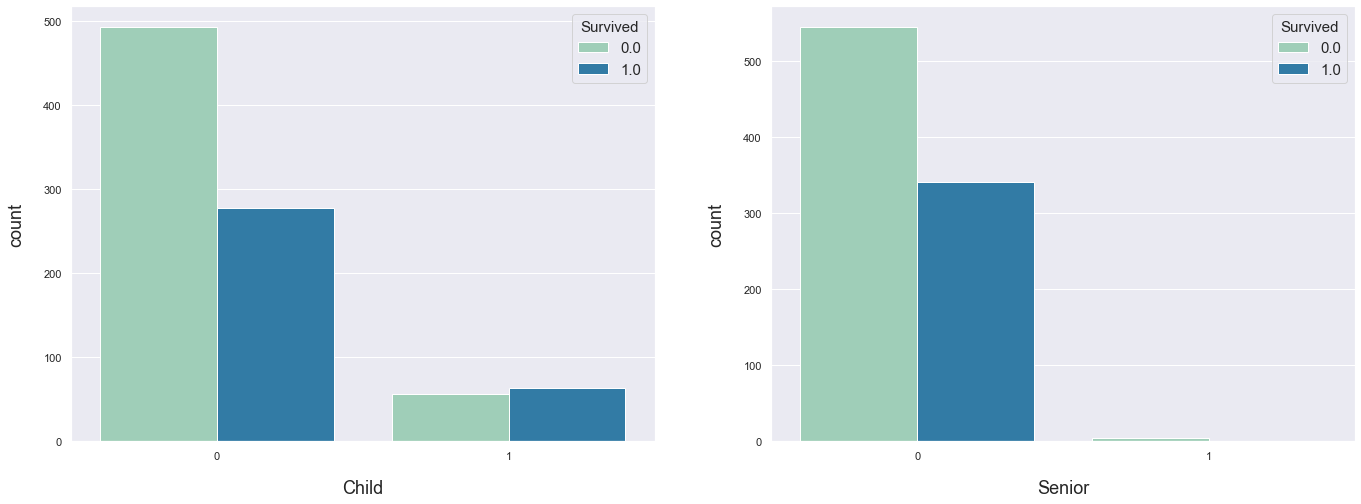

In [131]:
fig, ax = plt.subplots(ncols=2, figsize=(23,8))

sns.countplot(x="Child", data=full_df[:train_shape[0]], hue="Survived", fill=True, ax=ax[0], palette="YlGnBu")
sns.countplot(x="Senior", data=full_df[:train_shape[0]], hue="Survived", fill=True, ax=ax[1], palette="YlGnBu")

### 6.3. Standard Scaling Data

In many machine learning algorithms, to bring all features in the same standing, we need to do scaling so that one significant number doesn’t impact the model just because of their large magnitude.

Feature scaling in machine learning is one of the most critical steps during the pre-processing of data before creating a machine learning model. Scaling can make a difference between a weak machine learning model and a better one.

The most common techniques of feature scaling are Normalization and Standardization.

Normalization is used when we want to bound our values between two numbers, typically, between [0,1] or [-1,1]. While Standardization transforms the data to have zero mean and a variance of 1.

In [188]:
from sklearn.preprocessing import StandardScaler

scaler_cols = ['Age', 'Fare', 'Name_Length', 'Family_Size',
               'Ticket_Frequency', 'Fare_Family_Size', 'Fare_Cat_Pclass']
std = StandardScaler()
std.fit(full_df[scaler_cols])

StandardScaler()

In [133]:
df_std = pd.DataFrame(std.transform(full_df[scaler_cols]), index=full_df.index, columns = scaler_cols)
full_df.drop(scaler_cols, axis=1, inplace=True)
full_df = pd.concat((full_df, df_std), axis=1)

### 6.4. Split Data back to Train and Test

In [134]:
features = ["Survived",'Family_Friends_Surv_Rate','Surv_Rate_Invalid', "Age_Band"]
df = full_df.copy()
df.loc[df.PassengerId.isin(full_df_model.PassengerId), features] = full_df_model[features]
passenger_list = full_df_model["PassengerId"].tolist()
full_df_model = df[df["PassengerId"].isin(passenger_list)]

In [135]:
df_train_final = full_df[:train_shape[0]]
df_test_final = full_df[train_shape[0]:]

In [136]:
df_test_final.drop(["Survived"], axis=1, inplace=True)

# 7. Checking Feature Importance by Correlation Analysis

In [137]:
df_train_final.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Title,Emb_C,Emb_Q,Emb_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Royal,Fsize_Cat,isAlone,Family_Friends_Surv_Rate,Surv_Rate_Invalid,Cabin_Clean,Tkt_AS,Tkt_C,Tkt_CA,Tkt_CASOTON,Tkt_FC,Tkt_FCC,Tkt_Fa,Tkt_LINE,Tkt_NUM,Tkt_PC,Tkt_PP,Tkt_PPP,Tkt_SC,Tkt_SCA,Tkt_SCAH,Tkt_SCAHBasle,Tkt_SCOW,Tkt_SCPARIS,Tkt_SCParis,Tkt_SOC,Tkt_SOP,Tkt_SOPP,Tkt_SOTONO,Tkt_SOTONOQ,Tkt_SP,Tkt_STONO,Tkt_SWPP,Tkt_WC,Tkt_WEP,Fare_Cat,Fare_Cat_Title,Fsize_Cat_Title,Fsize_Cat_Fare_Cat,Pclass_Title,Fsize_Cat_Pclass,Age_Band,Child,Senior,Age,Fare,Name_Length,Family_Size,Ticket_Frequency,Fare_Family_Size,Fare_Cat_Pclass
0,1,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,1,0,0,0,2.0,0,0.3838,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,1.000000,3.0,6.0,0.376289,0,0,-0.589471,-0.503175,-0.459260,0.073352,-0.619174,-0.472287,0.744257
1,2,1.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,0,0,0,1,0,0,2.0,0,1.0000,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,9.0,6.0,1.500000,3.0,2.0,0.382979,0,0,0.610192,0.734809,2.506624,0.073352,-0.057108,0.423317,-1.114965
2,3,1.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0,1,0,0,0,0,3.0,1,0.3838,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,4.0,6.0,0.666667,6.0,9.0,0.373333,0,0,-0.289555,-0.490124,-0.459260,-0.558346,-0.619174,-0.352002,0.744257
3,4,1.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,0,0,0,1,0,0,2.0,0,0.5000,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,9.0,6.0,1.500000,3.0,2.0,0.382979,0,0,0.385255,0.383264,1.603964,0.073352,-0.057108,0.168996,-1.114965
4,5,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,1,0,0,0,3.0,1,0.3838,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,0.666667,3.0,9.0,0.382979,0,0,0.385255,-0.487708,-0.330309,-0.558346,-0.619174,-0.348506,0.744257


In [138]:
corr_mat = df_train_final.astype(float).corr()
corr_mat_fil = corr_mat.loc[:, 'Survived'].sort_values(ascending=False)
corr_mat_fil = pd.DataFrame(data=corr_mat_fil[1:])

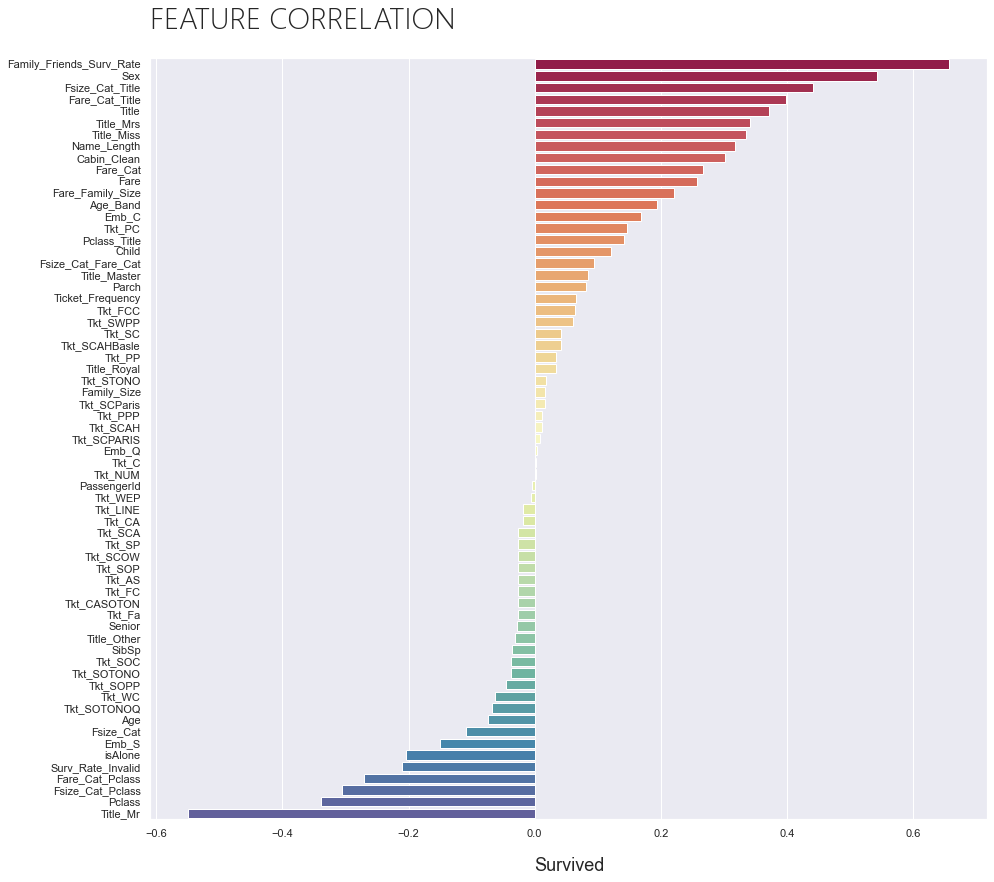

In [139]:
plt.figure(figsize=(15,14))
bar = sns.barplot(x=corr_mat_fil.Survived, y=corr_mat_fil.index, data=corr_mat_fil, palette="Spectral")
title = bar.set_title("FEATURE CORRELATION", x=0.0, y=1.01, ha='left',
             fontweight=100, fontfamily='Segoe UI', size=30)

In [140]:
df_corr = df_train_final.drop(["PassengerId"], axis=1)
corrmat = df_corr.corr()
sorted_corrs = corrmat['Survived'].abs().sort_values(ascending=False)
print(sorted_corrs)

Survived                    1.000000
Family_Friends_Surv_Rate    0.657499
Title_Mr                    0.549199
Sex                         0.543351
Fsize_Cat_Title             0.441578
Fare_Cat_Title              0.398025
Title                       0.371400
Title_Mrs                   0.341994
Pclass                      0.338481
Title_Miss                  0.335636
Name_Length                 0.317092
Fsize_Cat_Pclass            0.305429
Cabin_Clean                 0.301116
Fare_Cat_Pclass             0.270913
Fare_Cat                    0.266857
Fare                        0.257307
Fare_Family_Size            0.221600
Surv_Rate_Invalid           0.211145
isAlone                     0.203367
Age_Band                    0.193380
Emb_C                       0.168240
Emb_S                       0.149683
Tkt_PC                      0.147062
Pclass_Title                0.141829
Child                       0.121274
Fsize_Cat                   0.108631
Fsize_Cat_Fare_Cat          0.093883
T

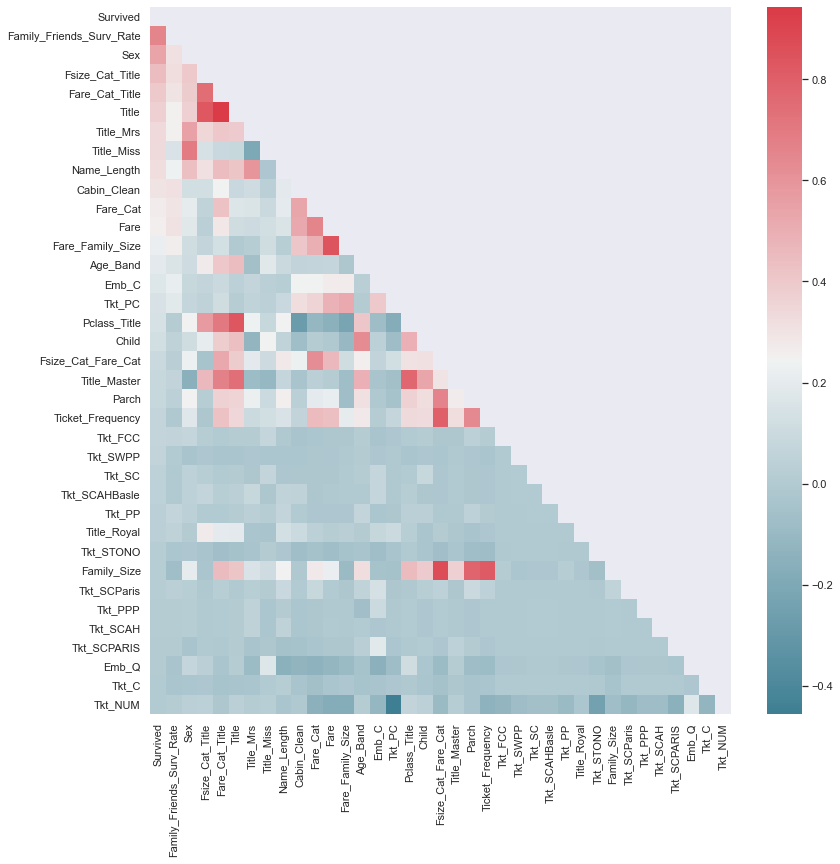

In [141]:
corr = df_train_final.corr()
top_corr_cols = corr[abs((corr.Survived)>=.0)].Survived.sort_values(ascending=False).keys()
top_corr = corr.loc[top_corr_cols, top_corr_cols]
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
plt.figure(figsize=(13, 13))
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=False, fmt=".2f", mask=dropSelf)
plt.show()

#### VIF

Colinearity is the state where two variables are highly correlated and contain similiar information about the variance within a given dataset. To detect colinearity among variables, simply create a correlation matrix and find variables with large absolute values

Multicolinearity on the other hand is more troublesome to detect because it emerges when three or more variables, which are highly correlated, are included within a model. To make matters worst multicolinearity can emerge even when isolated pairs of variables are not colinear.

The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.

* VIF starts at 1 and has no upper limit
* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others


Multi-collinearity will not be a problem for most of the classification problems. Once when we have two identical columns, the model (e.g. Random Forest) will automatically "drop" one column at each split. So, let's just visualize the output.

In [142]:
X = df_train_final.drop(["Survived", "PassengerId"], axis=1)
X = X.assign(const=1)
calc_vif(X)

,variables,VIF
0,Pclass,215.123928
1,Sex,102.238621
2,SibSp,inf
3,Parch,inf
4,Title,inf
5,Emb_C,inf
6,Emb_Q,inf
7,Emb_S,inf
8,Title_Master,inf
9,Title_Miss,inf


# 8. Preparation of Train & Test Data

### 8.1. Split the data

In [143]:
passenger_train = df_train_train["PassengerId"].tolist()
df_train = full_df_model[full_df_model["PassengerId"].isin(passenger_train)]

In [144]:
passenger_test = df_train_test["PassengerId"].tolist()
df_test = full_df_model[full_df_model["PassengerId"].isin(passenger_test)]
df_test.loc[df_test.PassengerId.isin(y_train_test.PassengerId), "Survived"] = y_train_test["Survived"]

In [145]:
X_train = df_train.drop(["Survived", "PassengerId"], axis=1)
y_train = df_train["Survived"]
X_test = df_test.drop(["Survived", "PassengerId"], axis=1)
y_test = df_test["Survived"]

In [146]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(713, 64) (178, 64) (713,) (178,)


In [147]:
all_passenger = passenger_train + passenger_test
df_train_final = full_df[full_df["PassengerId"].isin(all_passenger)]
df_test_final = full_df[~full_df["PassengerId"].isin(all_passenger)]

### 8.2. Cross Validation (K-Fold)

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

The general procedure is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    * Take the group as a hold out or test data set
    * Take the remaining groups as a training data set
    * Fit a model on the training set and evaluate it on the test set
    * Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

Importantly, each observation in the data sample is assigned to an individual group and stays in that group for the duration of the procedure. This means that each sample is given the opportunity to be used in the hold out set 1 time and used to train the model k-1 times.

#### Below we have an example of how to instantiate, but we will not be using it here.

In [148]:
k_fold = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)

# 9. Model Development

### 9.1. Model Evaluation

In [149]:
from sklearn.metrics import accuracy_score, make_scorer

def get_kfold_accuracy(model):
    score = model_selection.cross_val_score(model, X_train, y_train, cv=k_fold, scoring="accuracy")
    print("KFold Score:", round(np.mean(score) * 100, 2))
    
    return score

def get_accuracy(prediction):
    score = round(accuracy_score(prediction, y_test)*100,2)
    print("Accuracy", score)
    
    return score


### 9.2. Prediction

#### 9.2.1. AdaBoost

In [150]:
ada_boost = ensemble.AdaBoostClassifier()
ada_boost.fit(X_train, y_train)
prediction = ada_boost.predict(X_test)
ada_boost_score = get_accuracy(prediction)

Accuracy 80.34
KFold Score: 86.68


#### 9.2.2. Bagging Classifier

In [151]:
bagging = ensemble.BaggingClassifier()
bagging.fit(X_train, y_train)
prediction = bagging.predict(X_test)
bagging_score = get_accuracy(prediction)

Accuracy 75.84
KFold Score: 85.68


#### 9.2.3. Gradient Boosting Classifier

In [152]:
gradient_boosting = ensemble.GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
prediction = gradient_boosting.predict(X_test)
gradient_boosting_score = get_accuracy(prediction)

Accuracy 78.09
KFold Score: 88.22


#### 9.2.4. Extra Trees Classifier

In [153]:
extra_trees = ensemble.ExtraTreesClassifier()
extra_trees.fit(X_train, y_train)
prediction = extra_trees.predict(X_test)
extra_trees_score = get_accuracy(prediction)

Accuracy 79.21
KFold Score: 86.24


#### 9.2.5. Random Forest

In [154]:
random_forest = ensemble.RandomForestClassifier()
random_forest.fit(X_train, y_train)
prediction = random_forest.predict(X_test)
random_forest_score = get_accuracy(prediction)

Accuracy 81.46
KFold Score: 86.54


#### 9.2.6. Gaussian Process Classifier

In [155]:
gaussian_pr = gaussian_process.GaussianProcessClassifier()
gaussian_pr.fit(X_train, y_train)
prediction = gaussian_pr.predict(X_test)
gaussian_pr_score = get_accuracy(prediction)

Accuracy 85.39
KFold Score: 81.07


#### 9.2.7. Logistic Regression

In [156]:
logistic_regression_cv = linear_model.LogisticRegressionCV(max_iter=100000)
logistic_regression_cv.fit(X_train, y_train)
prediction = logistic_regression_cv.predict(X_test)
logistic_regression_cv_score = get_accuracy(prediction)

Accuracy 81.46
KFold Score: 87.23


In [157]:
logistic_regression = linear_model.LogisticRegression(random_state=1, max_iter=10000)
logistic_regression.fit(X_train, y_train)
prediction = logistic_regression.predict(X_test)
logistic_regression_score = get_accuracy(prediction)

Accuracy 79.78
KFold Score: 87.65


#### 9.2.8. Ridge Classifier

In [158]:
ridge = linear_model.RidgeClassifierCV()
ridge.fit(X_train, y_train)
prediction = ridge.predict(X_test)
ridge_score = get_accuracy(prediction)

Accuracy 82.58
KFold Score: 87.37


#### 9.2.9. Perceptron

In [159]:
perceptron = linear_model.Perceptron()
perceptron.fit(X_train, y_train)
prediction = perceptron.predict(X_test)
perceptron_score = get_accuracy(prediction)

Accuracy 78.65
KFold Score: 80.07


#### 9.2.10. Passive Aggressive Classifier

In [160]:
passive_aggressive = linear_model.PassiveAggressiveClassifier()
passive_aggressive.fit(X_train, y_train)
prediction = passive_aggressive.predict(X_test)
passive_aggressive_score = get_accuracy(prediction)

Accuracy 76.97
KFold Score: 83.43


#### 9.2.11. SGDClassifier

In [161]:
sdg = linear_model.SGDClassifier()
sdg.fit(X_train, y_train)
prediction = sdg.predict(X_test)
sdg_score = get_accuracy(prediction)

Accuracy 79.78
KFold Score: 81.48


#### 9.2.12. Gaussian Naive Bayes

In [162]:
gaussian_nb = naive_bayes.GaussianNB()
gaussian_nb.fit(X_train, y_train)
prediction = gaussian_nb.predict(X_test)
gaussian_nb_score = get_accuracy(prediction)

Accuracy 39.89
KFold Score: 45.98


#### 9.2.13. Bernoulli NB

In [163]:
bernoulli_nb = naive_bayes.BernoulliNB()
bernoulli_nb.fit(X_train, y_train)
prediction = bernoulli_nb.predict(X_test)
bernoulli_nb_score = get_accuracy(prediction)

Accuracy 80.34
KFold Score: 80.66


#### 9.2.14. kNN

In [164]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
knn_score = get_accuracy(prediction)

Accuracy 82.58
KFold Score: 80.5


#### 9.2.15. SVC

In [165]:
svc = svm.SVC(random_state=1, kernel='linear')
svc.fit(X_train, y_train)
prediction = svc.predict(X_test)
svc_score = get_accuracy(prediction)

Accuracy 80.9
KFold Score: 88.35


#### 9.2.16. Linear SVC

In [166]:
svc_linear = svm.LinearSVC(random_state=1, max_iter=100000)
svc_linear.fit(X_train, y_train)
prediction = svc_linear.predict(X_test)
svc_linear_score = get_accuracy(prediction)

Accuracy 79.78
KFold Score: 87.79


#### 9.2.17. NuSVC

In [167]:
svc_nu = svm.NuSVC(probability=True)
svc_nu.fit(X_train, y_train)
prediction = svc_nu.predict(X_test)
svc_nu_score = get_accuracy(prediction)

Accuracy 83.71
KFold Score: 82.05


#### 9.2.18. Decision Tree

In [168]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
prediction = decision_tree.predict(X_test)
decision_tree_score = get_accuracy(prediction)

Accuracy 74.72
KFold Score: 83.02


#### 9.2.19. Linear Discriminant Analysis

In [169]:
linear_discriminant = discriminant_analysis.LinearDiscriminantAnalysis()
linear_discriminant.fit(X_train, y_train)
prediction = linear_discriminant.predict(X_test)
linear_discriminant_score = get_accuracy(prediction)

Accuracy 83.71
KFold Score: 86.82


#### 9.2.20. XGBoost

In [170]:
xgboost = XGBClassifier(random_state=1, objective="binary:logistic", 
                        n_estimators=10, eval_metric='mlogloss', use_label_encoder=False)
xgboost.fit(X_train, y_train)
prediction = xgboost.predict(X_test)
xgboost_score = get_accuracy(prediction)

Accuracy 80.9
KFold Score: 87.93


#### 9.2.21. Keras

In [171]:
from tensorflow.keras.metrics import *

def create_model():
    metrics = ['accuracy', Precision(), Recall()]
    model = Sequential()
    model.add(Input(shape=X_train.shape[1], name='Input_'))
    model.add(layers.Dense(8, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dense(16, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.1)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(16, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.1)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))

    optimize = optimizers.Adam(lr = 0.0001)
    model.compile(optimizer = optimize,loss = 'binary_crossentropy',metrics = metrics)
    
    return model

In [172]:
keras = wrappers.scikit_learn.KerasClassifier(build_fn = create_model, epochs = 600, batch_size = 32, verbose = 0)
keras.fit(X_train, y_train)
prediction = keras.predict(X_test)
keras_score = get_accuracy(prediction)

Accuracy 85.96


### 9.3. Model Performance

In [173]:
model_performance = pd.DataFrame({
    "Model": ["Ada Boost", 
              "Bagging", 
              "Keras", 
              "XGBClassifier", 
              "Linear Discriminant Analysis", 
              "Extra Tree",  
              "Decision Tree", 
              "SVM Nu",
             "SVM Linear",
             "SVM",
             "kNN",
             "Bernoulli Naive Bayes",
             "Gaussian Naive Bayes",
             "SDG",
             "Passive Aggressive",
             "Perceptron",
             "Ridge",
             "Logistic Regression",
             "Logistic Regression CV",
             "Gaussian Process",
             "Random Forest",
             "Gradient Boosting"],
    
    "Accuracy": [ada_boost_score, 
                 bagging_score, 
                 keras_score,
                xgboost_score,
                linear_discriminant_score,
                extra_trees_score,
                decision_tree_score,
                svc_nu_score,
                svc_linear_score,
                svc_score,
                knn_score,
                bernoulli_nb_score,
                gaussian_nb_score,
                sdg_score,
                passive_aggressive_score,
                perceptron_score,
                ridge_score,
                logistic_regression_score,
                logistic_regression_cv_score,
                gaussian_pr_score,
                random_forest_score,
                 gradient_boosting_score,
                ]
})

model_performance.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
2,Keras,85.96
19,Gaussian Process,85.39
4,Linear Discriminant Analysis,83.71
7,SVM Nu,83.71
16,Ridge,82.58
10,kNN,82.58
20,Random Forest,81.46
18,Logistic Regression CV,81.46
3,XGBClassifier,80.90
9,SVM,80.90


### 9.4. Stack

In [174]:
estimators = [('Gaussian Process',gaussian_pr), 
              ('Linear Discriminant', linear_discriminant),
              ('kNN', knn)]

stack = ensemble.StackingClassifier(estimators=estimators)
stack.fit(X_train, y_train)
prediction = stack.predict(X_test)
stack_score = get_accuracy(prediction)

Accuracy 85.39


### 9.5. Voting

In [175]:
voting = ensemble.VotingClassifier(
    estimators = [
        ('Gaussian Process',gaussian_pr),
        ('Linear Discriminant Analysis',linear_discriminant),
        ("SVM Nu", svc_nu),
        ("Knn", knn),
],
    voting = 'hard'
)

In [176]:
voting.fit(X_train, y_train)
prediction = voting.predict(X_test)
voting_score = get_accuracy(prediction)

Accuracy 88.76


### 9.6. Tunning Parameters

In [177]:
rf_clf = linear_model.LogisticRegression(random_state=1)

parameters = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(1, -1),
    'solver' : ['liblinear', "newton-cg", "lbfgs", "sag", "saga"]
}

grid_cv = model_selection.GridSearchCV(rf_clf, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(X_train, y_train)

best_estimator = grid_cv.best_estimator_
best_score = grid_cv.best_score_
best_params = grid_cv.best_params_

best_params

{'C': 0.3727593720314942, 'penalty': 'l1', 'solver': 'liblinear'}


# 10. Submission

In [178]:
all_passenger = passenger_train + passenger_test
df_train_final = full_df[full_df["PassengerId"].isin(all_passenger)]
X_train = df_train_final.drop(["PassengerId", "Survived"], axis=1)
y_train = df_train_final["Survived"]

df_test_final = full_df[~full_df["PassengerId"].isin(all_passenger)]
X_test = df_test_final.drop(["PassengerId", "Survived"], axis=1)

### 10.1. Submiting Using Keras

In [179]:
keras = wrappers.scikit_learn.KerasClassifier(build_fn = create_model, epochs = 600, batch_size = 32, verbose = 0)
keras.fit(X_train, y_train)
prediction = keras.predict(X_test)
y_pred = []
for y in prediction:
    y_pred.append(y[0])

### 10.2. Submitting Using Stack

In [181]:
gaussian_pr = gaussian_process.GaussianProcessClassifier()
gaussian_pr.fit(X_train, y_train)

linear_discriminant = discriminant_analysis.LinearDiscriminantAnalysis()
linear_discriminant.fit(X_train, y_train)

knn = neighbors.KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)

estimators = [('Gaussian Process',gaussian_pr), 
              ('Linear Discriminant', linear_discriminant),
              ('kNN', knn)]

stack = ensemble.StackingClassifier(estimators=estimators)
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)

### 10.3. Submitting Using Voting

In [185]:
voting = ensemble.VotingClassifier(
    estimators = [
        ('Gaussian Process',gaussian_pr),
                  ('Linear Discriminant Analysis',linear_discriminant),
                  ("SVM Nu", svc_nu),
        ("Knn", knn),
                 ],
    voting = 'hard'
)

voting.fit(X_train, y_train)
prediction = voting.predict(X_test)
y_pred = stack.predict(X_test)

### 10.4. Final Submission Adjustments

In [186]:
submission = pd.DataFrame({ 
    "PassengerId": df_test_final["PassengerId"],
    "Survived": y_pred
})
submission.Survived = submission.Survived.astype(int)
submission.to_csv(r"../data/submission.csv", index=False)

In [187]:
submission.head(10)

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1
896,897,0
897,898,1
898,899,1
899,900,1
900,901,0


# 11. Credits & References
https://www.kaggle.com/sreevishnudamodaran/ultimate-eda-fe-neural-network-model-top-2

https://en.wikipedia.org/wiki/Pandas_(software)

https://en.wikipedia.org/wiki/NumPy

https://seaborn.pydata.org/#

https://en.wikipedia.org/wiki/Matplotlib

https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

https://etav.github.io/python/vif_factor_python.html

https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

https://machinelearningmastery.com/k-fold-cross-validation/